# Unsupervised Learning

Unsupervised learning, also known as unsupervised machine learning, uses machine learning algorithms to analyze and cluster unlabeled datasets. These algorithms discover hidden patterns or data groupings without the need for human intervention. Its ability to discover similarities and differences in information make it the ideal solution for exploratory data analysis, cross-selling strategies, customer segmentation, and image recognition.

![Unsupervised Learning](./unsupervised-learning.png)

We will mention 

- K-means Clustering
- Hierarchical Clustering
- Pricipal Component Analysis

**Source:**

[IBM Cloud](https://www.ibm.com/cloud/learn/unsupervised-learning#:~:text=Unsupervised%20learning%2C%20also%20known%20as,the%20need%20for%20human%20intervention)

## K-Means Clustering

K-Means is one of the most popular "clustering" algorithms. K-means stores $k$ centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid.

K-Means finds the best centroids by alternating between (1) assigning data points to clusters based on the current centroids (2) chosing centroids (points which are the center of a cluster) based on the current assignment of data points to clusters.

![K-Means](./kmeans.png)

**Figure 1:** K-means algorithm. Training examples are shown as dots, and cluster centroids are shown as crosses. (a) Original dataset. (b) Random initial cluster centroids. (c-f) Illustration of running two iterations of k-means. In each iteration, we assign each training example to the closest cluster centroid (shown by "painting" the training examples the same color as the cluster centroid to which is assigned); then we move each cluster centroid to the mean of the points assigned to it. Images courtesy of Michael Jordan.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
# Dataset Implementation
df= pd.read_csv("../dataset/USArrests.csv", index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [6]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 4.5+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


array([[<AxesSubplot:title={'center':'Murder'}>,
        <AxesSubplot:title={'center':'Assault'}>],
       [<AxesSubplot:title={'center':'UrbanPop'}>,
        <AxesSubplot:title={'center':'Rape'}>]], dtype=object)

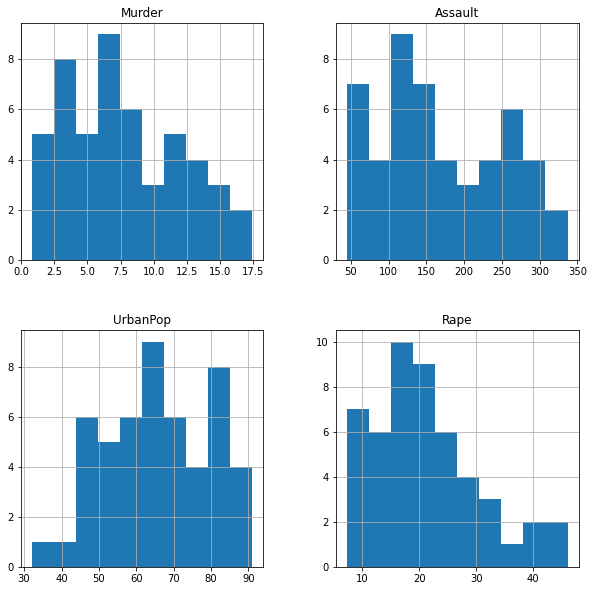

In [9]:
df.hist(figsize=(10,10))

In [15]:
kmeans_model = KMeans(n_clusters = 2).fit(df)

In [ ]:
?kmeans_model

In [23]:
centroid = kmeans_model.cluster_centers_

In [24]:
clusters = kmeans_model.labels_

### Visualization of the Clusters

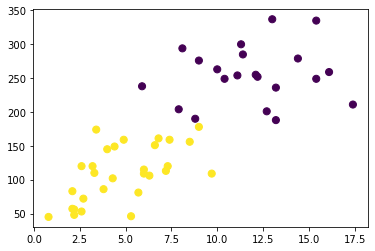

In [25]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c =clusters, s=50, cmap="viridis");

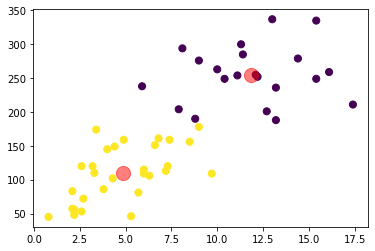

In [28]:
# Showing the cluster centers
plt.scatter(df.iloc[:,0], df.iloc[:,1], c =clusters, s=50, cmap="viridis");
plt.scatter(centroid[:,0], centroid[:,1], c="red", s=200, alpha=0.5);

### Optimum Cluster Number - Tuning

We will use Elbow method

![Elbow](./elbow-method.png)

Text(0.5, 1.0, 'Elbow Method for Optimum Cluster Number')

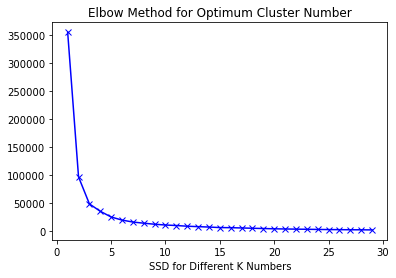

In [30]:
ssd = []

k = range(1,30)

for i in k:
    kmeans = KMeans(n_clusters=i).fit(df)
    ssd.append(kmeans.inertia_)

plt.plot(k, ssd, "bx-")
plt.xlabel("SSD for Different K Numbers")
plt.title("Elbow Method for Optimum Cluster Number")

In [ ]:
!pip install yellowbrick

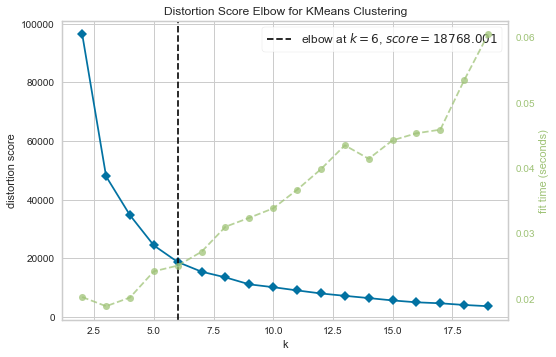

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
# Different Method for Optimum Cluster Number
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
vis = KElbowVisualizer(kmeans, k =(2,20))
vis.fit(df)
vis.poof()

In [33]:
# Final Model
kmeans = KMeans(n_clusters=6).fit(df)

clusters = kmeans.labels_
pd.DataFrame({"States": df.index, "Clusters": clusters})
df["Cluster_No"] = clusters
df.head()

,Murder,Assault,UrbanPop,Rape,Cluster_No
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,4
Arkansas,8.8,190,50,19.5,5
California,9.0,276,91,40.6,1


## Hierarchical Cluster Analysis

Hierarchical clustering, also known as hierarchical cluster analysis (HCA), is an unsupervised clustering algorithm that can be categorized in two ways; **they can be agglomerative or divisive.** Agglomerative clustering is considered a “bottoms-up approach.” Its data points are isolated as separate groupings initially, and then they are merged together iteratively on the basis of similarity until one cluster has been achieved. Four different methods are commonly used to measure similarity:

**Ward’s linkage:** This method states that the distance between two clusters is defined by the increase in the sum of squared after the clusters are merged.

**Average linkage:** This method is defined by the mean distance between two points in each cluster

**Complete (or maximum) linkage:** This method is defined by the maximum distance between two points in each cluster

**Single (or minimum) linkage:** This method is defined by the minimum distance between two points in each cluster

Euclidean distance is the most common metric used to calculate these distances; however, other metrics, such as Manhattan distance, are also cited in clustering literature.

Divisive clustering can be defined as the opposite of agglomerative clustering; instead it takes a “top-down” approach. In this case, a single data cluster is divided based on the differences between data points. Divisive clustering is not commonly used, but it is still worth noting in the context of hierarchical clustering. These clustering processes are usually visualized using a dendrogram, a tree-like diagram that documents the merging or splitting of data points at each iteration.

![Hierarchical Cluster](./Hierarchical-Cluster.png)


**Source:**

[IBM Cloud](https://www.ibm.com/cloud/learn/unsupervised-learning#:~:text=Unsupervised%20learning%2C%20also%20known%20as,the%20need%20for%20human%20intervention)

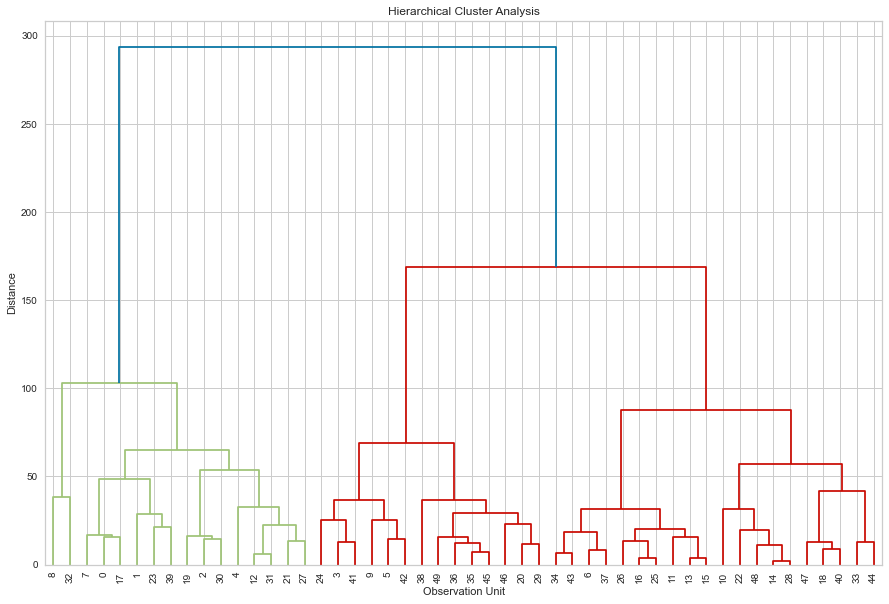

In [36]:
from scipy.cluster.hierarchy import linkage, dendrogram

hc_complete = linkage(df, "complete")
hc_average = linkage(df, "average")

plt.figure(figsize= (15,10));
plt.title("Hierarchical Cluster Analysis")
plt.xlabel("Observation Unit")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size=10);

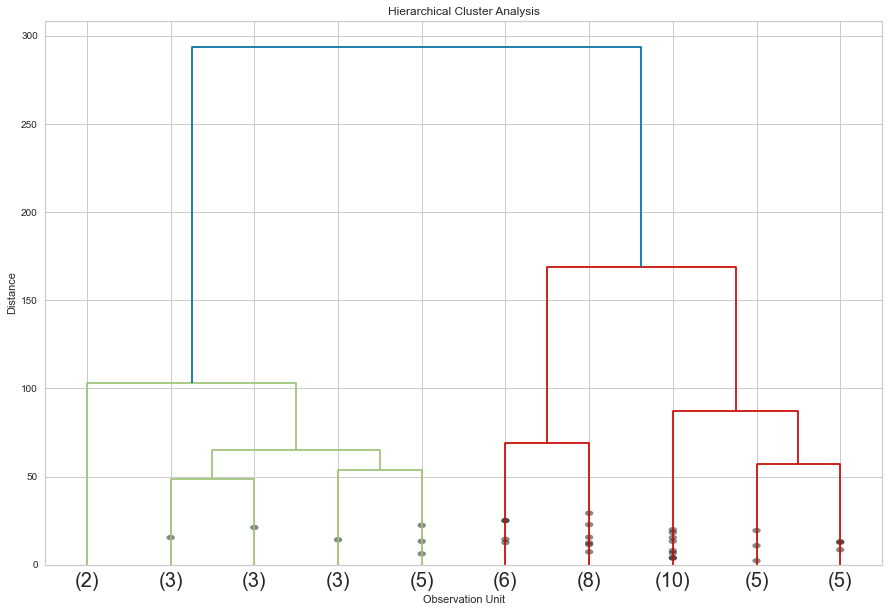

In [39]:
plt.figure(figsize= (15,10));
plt.title("Hierarchical Cluster Analysis")
plt.xlabel("Observation Unit")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size=20, truncate_mode="lastp", p=10, show_contracted=True);

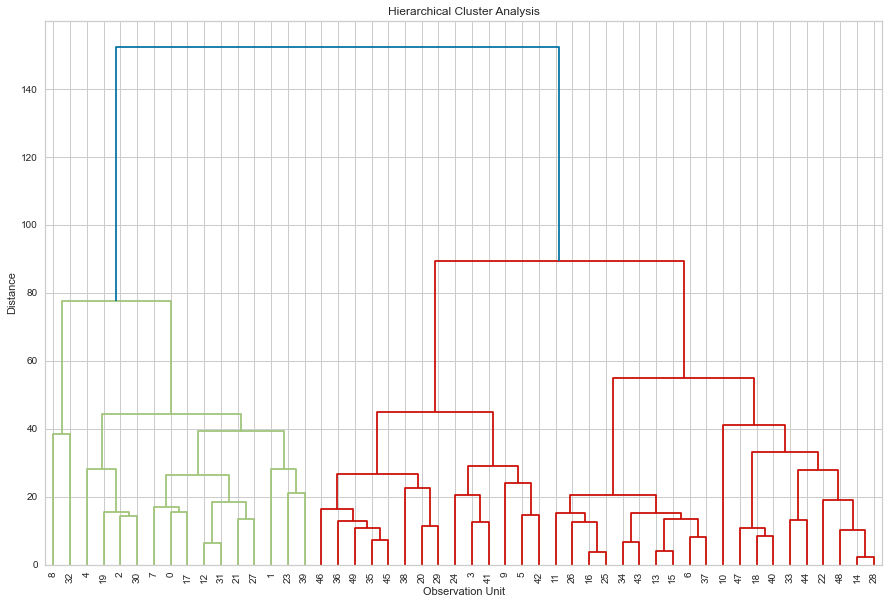

In [40]:
plt.figure(figsize= (15,10));
plt.title("Hierarchical Cluster Analysis")
plt.xlabel("Observation Unit")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size=10);

## Principal Componenet Analysis

If you’ve worked with a lot of variables before, you know this can present problems. Do you understand the relationships between each variable? Do you have so many variables that you are in danger of overfitting your model to your data or that you might be violating assumptions of whichever modeling tactic you’re using?

You might ask the question, “How do I take all of the variables I’ve collected and focus on only a few of them?” In technical terms, you want to “reduce the dimension of your feature space.” By reducing the dimension of your feature space, you have fewer relationships between variables to consider and you are less likely to overfit your model.

Somewhat unsurprisingly, reducing the dimension of the feature space is called “dimensionality reduction.” There are many ways to achieve dimensionality reduction, but most of these techniques fall into one of two classes:
- Feature Elimination
- Feature Extraction

**Feature Elimination** 

is what it sounds like: we reduce the feature space by eliminating features.

As a disadvantage, though, you gain no information from those variables you’ve dropped. If we only use last year’s GDP, the proportion of the population in manufacturing jobs per the most recent American Community Survey numbers, and unemployment rate to predict this year’s GDP, we’re missing out on whatever the dropped variables could contribute to our model. By eliminating features, we’ve also entirely eliminated any benefits those dropped variables would bring.

**Feature extraction,**

however, doesn’t run into this problem. Say we have ten independent variables. In feature extraction, we create ten “new” independent variables, where each “new” independent variable is a combination of each of the ten “old” independent variables. However, we create these new independent variables in a specific way and order these new variables by how well they predict our dependent variable.

You might say, “Where does the dimensionality reduction come into play?” Well, we keep as many of the new independent variables as we want, but we drop the “least important ones.” Because we ordered the new variables by how well they predict our dependent variable, we know which variable is the most important and least important. But — and here’s the kicker — because these new independent variables are combinations of our old ones, we’re still keeping the most valuable parts of our old variables, even when we drop one or more of these “new” variables!

**Principal Caomponent Analysis**

Principal component analysis is a technique for feature extraction — so it combines our input variables in a specific way, then we can drop the “least important” variables while still retaining the most valuable parts of all of the variables! As an added benefit, each of the “new” variables after PCA are all independent of one another. This is a benefit because the assumptions of a linear model require our independent variables to be independent of one another. If we decide to fit a linear regression model with these “new” variables (see “principal component regression” below), this assumption will necessarily be satisfied.

**When should I use PCA?**

- Do you want to reduce the number of variables, but aren’t able to identify variables to completely remove from consideration?
- Do you want to ensure your variables are independent of one another?
- Are you comfortable making your independent variables less interpretable?


If you answered “yes” to all three questions, then PCA is a good method to use. If you answered “no” to question 3, you should not use PCA.

**How does PCA work?**


The section after this discusses why PCA works, but providing a brief summary before jumping into the algorithm may be helpful for context:
We are going to calculate a matrix that summarizes how our variables all relate to one another.


We’ll then break this matrix down into two separate components: direction and magnitude. We can then understand the “directions” of our data and its “magnitude” (or how “important” each direction is). The screenshot below, from the setosa.io applet, displays the two main directions in this data: the “red direction” and the “green direction.” In this case, the “red direction” is the more important one. We’ll get into why this is the case later, but given how the dots are arranged, can you see why the “red direction” looks more important than the “green direction?” (Hint: What would fitting a line of best fit to this data look like?)

![PCA](./pca1.png)


We will transform our original data to align with these important directions (which are combinations of our original variables). The screenshot below (again from setosa.io) is the same exact data as above, but transformed so that the x- and y-axes are now the “red direction” and “green direction.” What would the line of best fit look like here?

![PCA](./pca2.png)

While the visual example here is two-dimensional (and thus we have two “directions”), think about a case where our data has more dimensions. By identifying which “directions” are most “important,” we can compress or project our data into a smaller space by dropping the “directions” that are the “least important.” **By projecting our data into a smaller space, we’re reducing the dimensionality of our feature space… but because we’ve transformed our data in these different “directions,” we’ve made sure to keep all original variables in our model!**

- The two charts show the exact same data, but the secound graph reflects the original data transformed so that our axes are now the principal components.
- In both graphs, the principal components are perpendicular to one another. In fact, every principal component will ALWAYS be orthogonal (a.k.a. official math term for perpendicular) to every other principal component.

**Source:**

[Setosa.io](https://setosa.io/ev/principal-component-analysis/)

[Towards Data Science](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c)

In [41]:
df = pd.read_csv("../dataset/Hitters.csv")
df.dropna(inplace=True)
df =df._get_numeric_data()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [42]:
from sklearn.preprocessing import StandardScaler

df = StandardScaler().fit_transform(df)

In [44]:
df[0:5,0:5]

array([[-0.6029005 , -0.59567545, -0.5285512 , -1.2061115 , -0.52206292],
       [ 0.51254171,  0.49225957,  0.72996619,  0.44151497,  0.79405962],
       [ 0.62816682,  0.73648988,  0.95878753,  0.40228577,  1.02631654],
       [-0.56209164, -0.46245892, -0.18531919, -0.61767348, -0.36722498],
       [ 1.29471156,  1.35816704, -0.87178322,  0.75534858, -0.0188396 ]])

In [45]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df)

In [47]:
pca_df = pd.DataFrame(data=pca_fit, columns=["1. Component", "2. Component"])
pca_df.head()

,1. Component,2. Component
0,0.076848,1.653525
1,0.337127,-2.320560
2,3.408362,0.755757
3,-2.642221,-0.361486
4,1.071681,-1.511674


In [49]:
# That means we can represent our dataset almost %70 with PCA
pca.explained_variance_ratio_

array([0.45245466, 0.24246801])

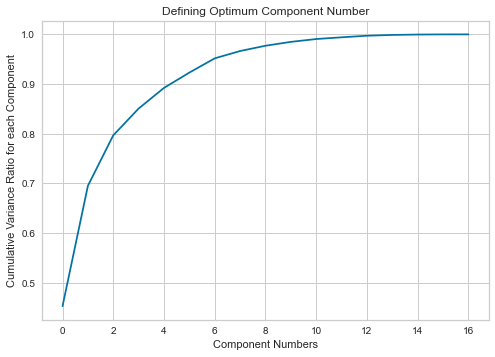

In [53]:
# Optimum component number
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Component Numbers")
plt.ylabel("Cumulative Variance Ratio for each Component")
plt.title("Defining Optimum Component Number");

In [54]:
# Final 
pca = PCA(n_components=3)
pca_fit = pca.fit_transform(df)
pca.explained_variance_ratio_

array([0.45245466, 0.24246801, 0.1016968 ])